# In this file the images are preprocessed into arrays

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random
import joblib

DATADIR = "D:\Dataset"
CATEGORIES = ["bacterial_leaf_blight", "brown_spot", "leaf_smut"]

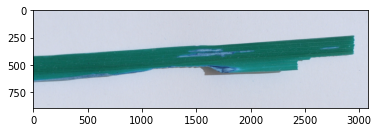

In [28]:
for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img))
        plt.imshow(img_array)
        plt.show()
        break
    break    

In [29]:
print(img_array)

[[[209 214 229]
  [209 214 229]
  [210 215 230]
  ...
  [211 215 226]
  [211 215 226]
  [212 216 227]]

 [[209 214 229]
  [209 214 229]
  [210 215 230]
  ...
  [209 215 226]
  [208 214 225]
  [210 216 227]]

 [[209 214 229]
  [209 214 229]
  [209 214 229]
  ...
  [210 216 227]
  [209 215 226]
  [210 216 227]]

 ...

 [[212 215 230]
  [211 214 229]
  [211 214 229]
  ...
  [207 213 226]
  [207 213 226]
  [208 214 225]]

 [[213 216 231]
  [212 215 230]
  [211 214 229]
  ...
  [208 214 227]
  [208 214 227]
  [209 215 226]]

 [[211 215 233]
  [211 215 233]
  [210 214 232]
  ...
  [212 214 225]
  [209 213 224]
  [206 212 223]]]


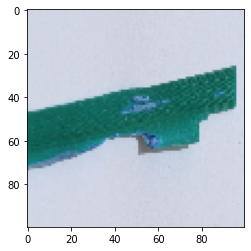

In [30]:
IMG_SIZE = 100

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array)
plt.show()

In [31]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            
                img_array = cv2.imread(os.path.join(path, img))
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
          
            
           
            
create_training_data()


           
    

In [32]:
len(training_data)

120

In [33]:
random.shuffle(training_data)

In [34]:
for sample in training_data[:10]:
    print(sample[1])

0
1
0
0
1
2
0
2
0
0


In [35]:
x = []
y = []

In [36]:
for features, label in training_data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 3)   

In [37]:
joblib.dump(X, 'images_array.joblib')
joblib.dump(y, 'images_labels.joblib')

['images_labels.joblib']